In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

x,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

df = pd.DataFrame(x, columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,1.041074,-1.421381,-0.973231,-1.776062,0.155486,1
1,-0.189968,-3.458733,-2.898788,-1.032850,0.934553,1
2,1.761797,-0.226098,1.802987,-0.309190,1.231419,0
3,2.780812,-0.387971,-0.914074,-0.573465,1.654233,1
4,-0.183613,0.510657,1.092452,-1.321568,-2.896667,0


In [2]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [23]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [25]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [26]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [27]:
df1 = sample_rows(df, 0.1)
df2 = sample_rows(df, 0.1)
df3 = sample_rows(df, 0.1)

clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'x[4] <= -0.429\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6, 0.5, 'x[1] <= 0.225\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

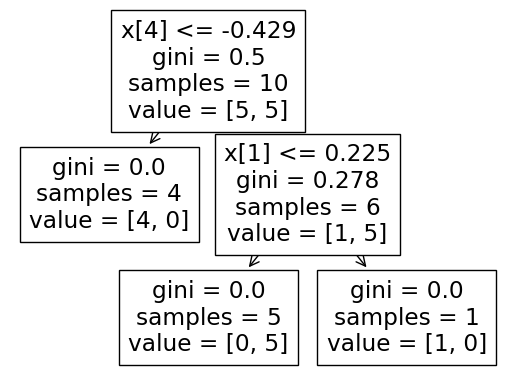

In [28]:
from sklearn.tree import plot_tree

plot_tree(clf1)

[Text(0.4, 0.8333333333333334, 'x[1] <= -0.406\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6, 0.5, 'x[3] <= 0.074\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

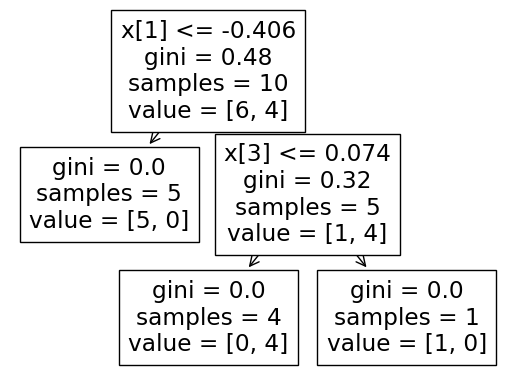

In [29]:
plot_tree(clf2)

[Text(0.5, 0.75, 'x[2] <= 0.947\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

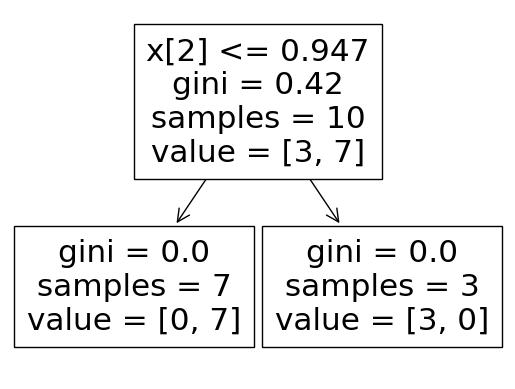

In [30]:
plot_tree(clf3)

In [34]:
clf1.predict(np.array([-1.042498, 0.5567, -0.04567, -0.064323, -0.005744]).reshape(1,5))

C:\Users\cshet\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [36]:
clf2.predict(np.array([-1.042498, 0.5567, -0.04567, -0.064323, -0.005744]).reshape(1,5))

C:\Users\cshet\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [37]:
clf3.predict(np.array([-1.042498, 0.5567, -0.04567, -0.064323, -0.005744]).reshape(1,5))

C:\Users\cshet\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])